In [11]:

from numpy import asarray
from numpy.random import randn
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

In [12]:
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	x_input = randn(latent_dim * n_samples)
	z_input = x_input.reshape(n_samples, latent_dim) #Reshape to be provided as input to the generator.
	return z_input

# Function to create a plot of generated images
def plot_generated(examples, n):
	# plot images
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :])
	plt.show()


In [13]:
from numpy import linspace

# Function to generate random latent points
#Same as defined above, re-defining for convenience. 
def generate_latent_points(latent_dim, n_samples, n_classes=10):
 	# generate points in the latent space
 	x_input = randn(latent_dim * n_samples)
 	z_input = x_input.reshape(n_samples, latent_dim) #Reshape to be provided as input to the generator.
 	return z_input

# Interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps=10):
 	# interpolate between points (e.g., between 0 and 1 if you divde to 10 then you have 0.111, 0.222, etc.)
 	ratios = linspace(0, 1, num=n_steps)
 	# linear interpolation of vectors based on the above interpolation ratios
 	vectors = list()
 	for ratio in ratios:
         v = (1.0 - ratio) * p1 + ratio * p2
         vectors.append(v)
 	return asarray(vectors)

# create a plot of generated images
def plot_generated(examples, n):
 	# plot images
 	for i in range(n):
         plt.subplot(1, n, 1 + i)
         plt.axis('off')
         plt.imshow(examples[i, :, :])
 	plt.show()

1/1 [==============================] - 1s 692ms/step


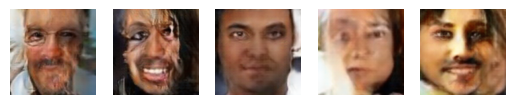

In [14]:
# load the saved model
model = load_model('C:/Project/sgenerator_model_128x128_100.h5')
# generate latent vectors to be used as input to the generator
#Here, we are generating 25 latent vectors
latent_points = generate_latent_points(100, 25)
# generate images using the loaded generator model
X  = model.predict(latent_points)
# scale from [-1,1] to [0,1] for plotting
X = (X + 1) / 2.0
# plot the generated images. Let us do 5x5 plot as we generated 25 images
plot_generated(X, 5)

1/1 [==============================] - 0s 294ms/step


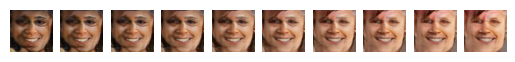

In [16]:

# generate points in latent space
#Let us generate 2 latent points between which we will interpolate
pts = generate_latent_points(100, 2)
# interpolate points in latent space
interpolated = interpolate_points(pts[0], pts[1])
# generate images using the interpolated latent points
X = model.predict(interpolated)
# scale from [-1,1] to [0,1] for plotting
X = (X + 1) / 2.0
# plot the result
plot_generated(X, len(interpolated))


C:\Users\likhi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


4/4 [==============================] - 3s 605ms/step


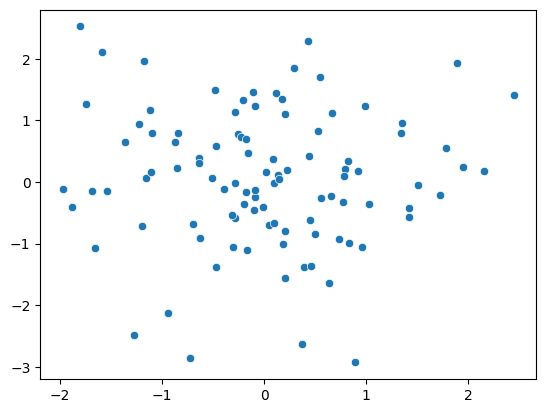

In [17]:
from numpy import mean, expand_dims
# example of loading the generator model and generating images

# Function to generate random latent points
#Same as defined above, re-defining for convenience. 
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	x_input = randn(latent_dim * n_samples)
	z_input = x_input.reshape(n_samples, latent_dim) #Reshape to be provided as input to the generator.
	return z_input

# create a plot of generated images and save for easy visualization
def plot_generated(examples, n):
    plt.figure(figsize=(16, 16))
    for i in range(n * n):
        plt.subplot(n, n, 1 + i)
        plt.axis('off')
        plt.imshow(examples[i, :, :])
    plt.savefig('generated_faces.png')
    plt.close()


# generate points in latent space that we can use to generate some images
#We then identify some images with our features of interest and locate thir corresponding latent vectors
latent_points = generate_latent_points(100, 100)

#Plot the latent points to see that they are spread around and we have no clue how to interpret them. 
import seaborn as sns
sns.scatterplot(latent_points[0], latent_points[1])

# generate images using the latent points. 
X  = model.predict(latent_points)
# scale from [-1,1] to [0,1] for plotting
X = (X + 1) / 2.0
# plot and save generated images
plot_generated(X, 10)


In [18]:
#Now, identify images corresponding to a specific type.
#e.g. all baby face images, smiling man images, 
# smiling man - neutral man + baby face = smiling baby

# retrieve specific points
#Now, identify images corresponding to a specific type.
#Start counting from 1 as we are going to offset our image number later, by subtracting 1.
#e.g. all baby face images, smiling man images, 
# smiling man - neutral man + baby face = smiling baby
#OR try adult with glasses  - adult no glasses + baby no glasses

#Identify a few images from classes of interest
# smiling_man_ix = [1, 10, 16, 26, 27, 28]
# neutral_man_ix = [16, 95, 63]
# baby_ix = [13,26,28,93,94]
adult_with_glasses = [22,23,41,97,100,60]
adult_no_glasses = [10, 12, 15]
#baby_no_glasses = [15,20]
person_with_lipstick = [84, 94, 43,92]
#person_no_lipstick = [1, 4, 9, 15]

#Reassign classes of interest to new variables... just to make it easy not
# to change names all the time we get interested in new features. 
feature1_ix = adult_with_glasses
feature2_ix = adult_no_glasses
feature3_ix = person_with_lipstick

# Function to average list of latent space vectors to get the mean for a given type
def average_points(points, ix):
	# subtract 1 from image index so it matches the image from the array
    # we are doing this as our array starts at 0 but we started counting at 1. 
	zero_ix = [i-1 for i in ix]
	# retrieve required vectors corresponding to the selected images
	vectors = points[zero_ix]
	# average the vectors
	avg_vector = mean(vectors, axis=0)
	
	return avg_vector


1/1 [==============================] - 0s 42ms/step


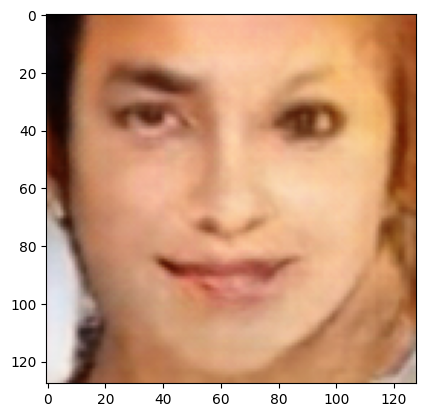

In [20]:
feature1 = average_points(latent_points, feature1_ix)
feature2 = average_points(latent_points, feature2_ix)
feature3 = average_points(latent_points, feature3_ix)

# Vector arithmetic....
result_vector = feature2 - feature1 + feature3

# generate image using the new calculated vector
result_vector = expand_dims(result_vector, 0)
result_image = model.predict(result_vector)

# scale pixel values for plotting
result_image = (result_image + 1) / 2.0
plt.imshow(result_image[0])
plt.show()